In [1]:
import time
import sys
sys.path.append('../')
from  librairies.dagfeaturingfx import *
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
import joblib
from joblib import Parallel,delayed
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier

In [2]:
%%time
TICKER_LIST = get_ticker_list()

CPU times: user 508 µs, sys: 928 µs, total: 1.44 ms
Wall time: 1.61 ms


In [3]:
%%time
_period = 'H1'
df_all = pd.DataFrame()
number_of_cpu = joblib.cpu_count()
delayed_funcs = [delayed(get_all_data)(_ticker=_ticker,_period=_period) for _ticker in tqdm(TICKER_LIST)]
parallel_pool = Parallel(n_jobs=number_of_cpu,prefer="processes")
%time df_all = df_all.append(parallel_pool(delayed_funcs))

100%|██████████| 42/42 [00:00<00:00, 156726.66it/s]
CPU times: user 843 ms, sys: 1.18 s, total: 2.02 s
Wall time: 32 s
CPU times: user 848 ms, sys: 1.19 s, total: 2.04 s
Wall time: 32 s


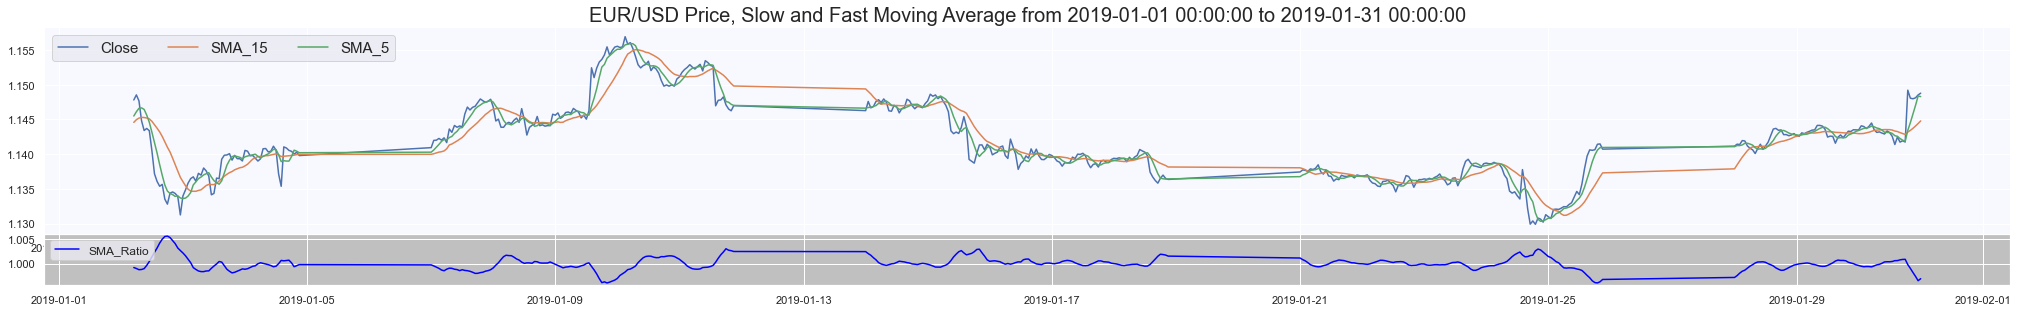

CPU times: user 2.44 s, sys: 306 ms, total: 2.75 s
Wall time: 2.74 s


In [4]:
%%time
##### Restriction sur les dates que pour me plot
_start = dt.datetime.strptime('2019-01-01', '%Y-%m-%d')
_end = dt.datetime.strptime('2019-01-31', '%Y-%m-%d')
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. sma(df_all) suffit
df_all = sma(df_all,_fast=5,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

100%|██████████| 41/41 [00:30<00:00,  1.36it/s]


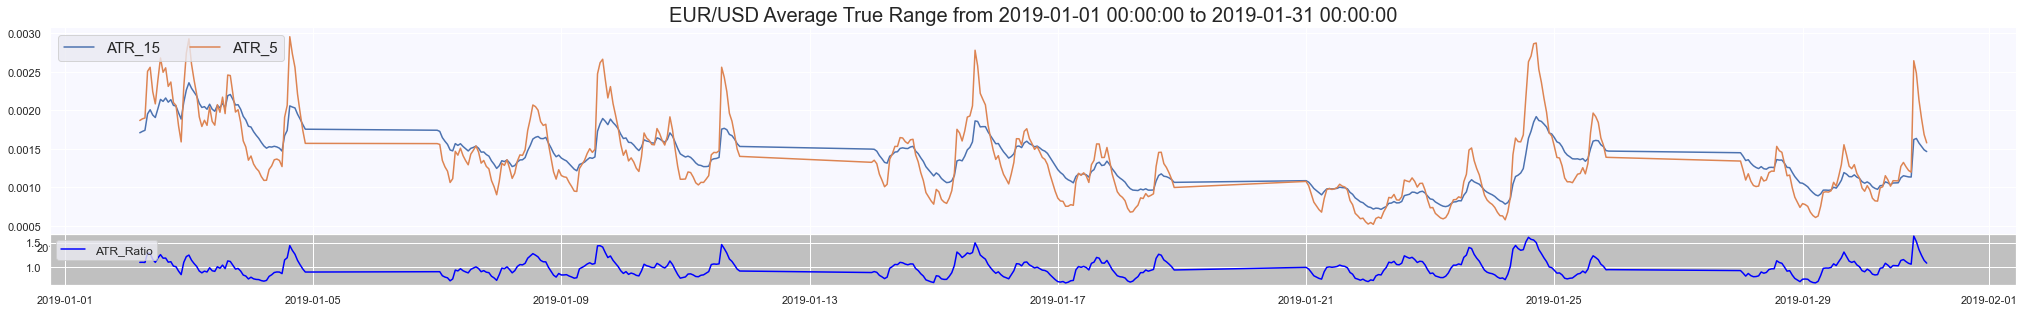

CPU times: user 30.9 s, sys: 1.28 s, total: 32.2 s
Wall time: 32.1 s


In [5]:
%%time
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. atr(df_all) suffit
df_all = atr(df_all,_fast=5,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

100%|██████████| 41/41 [00:30<00:00,  1.36it/s]


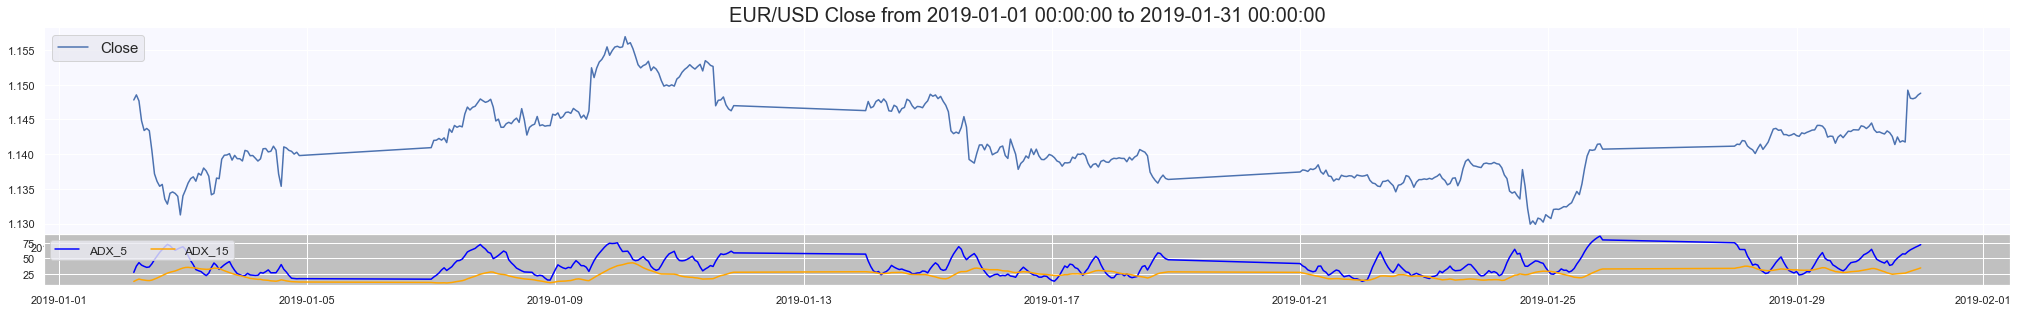

CPU times: user 1min 22s, sys: 3.35 s, total: 1min 25s
Wall time: 1min 25s


In [6]:
%%time
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. adx(df_all) suffit
df_all = adx(df_all,_fast=5,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

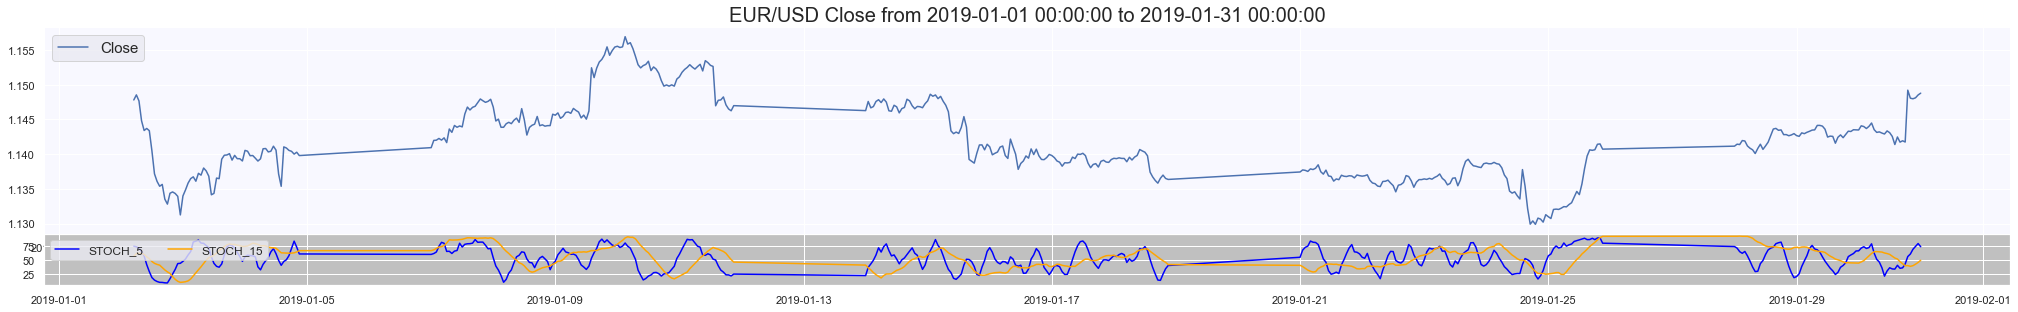

CPU times: user 3.96 s, sys: 727 ms, total: 4.69 s
Wall time: 4.53 s


In [7]:
%%time
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. adx(df_all) suffit
df_all = stochastic(df_all,_fast=5,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

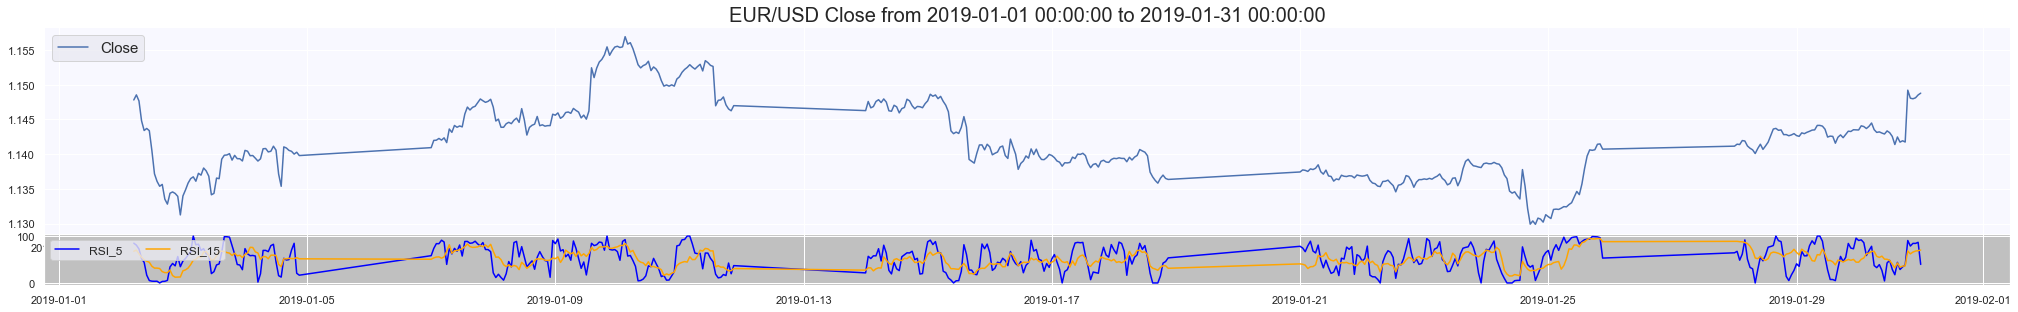

CPU times: user 5.14 s, sys: 1.43 s, total: 6.57 s
Wall time: 6.42 s


In [8]:
%%time
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. rsi(df_all) suffit
df_all = rsi(df_all,_fast=5,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

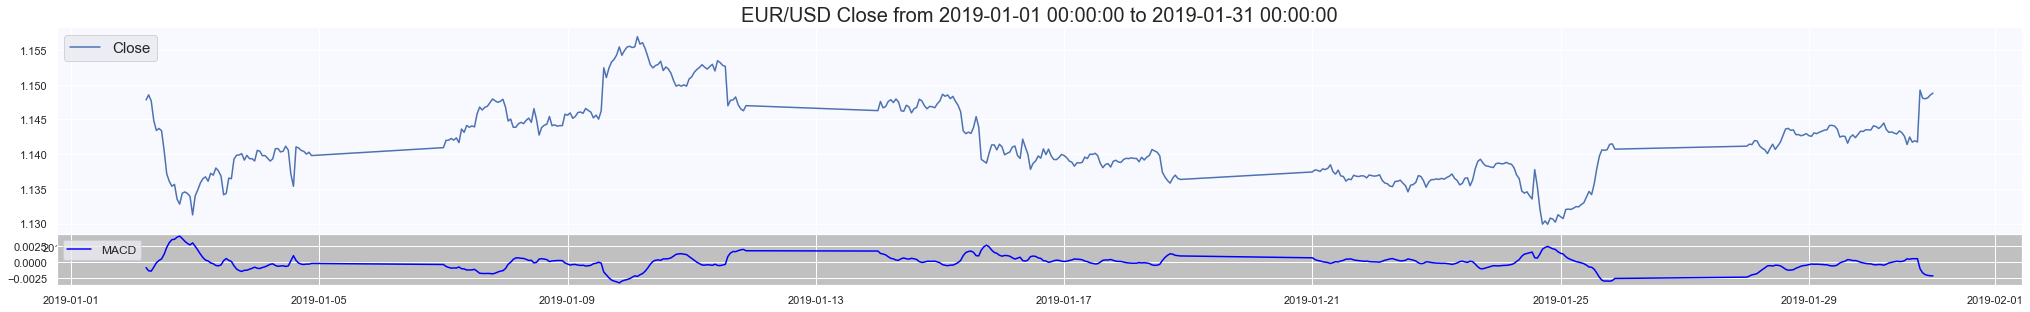

CPU times: user 2.62 s, sys: 608 ms, total: 3.23 s
Wall time: 3.2 s


In [9]:
%%time
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. macd(df_all) suffit
df_all = macd(df_all,_fast=5,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

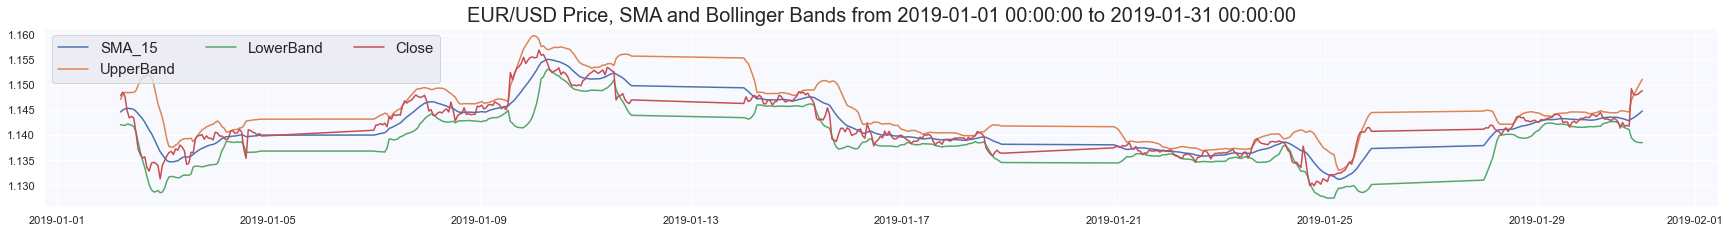

CPU times: user 2.66 s, sys: 700 ms, total: 3.36 s
Wall time: 3.3 s


In [10]:
%%time
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. macd(df_all) suffit
df_all = bollinger(df_all,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

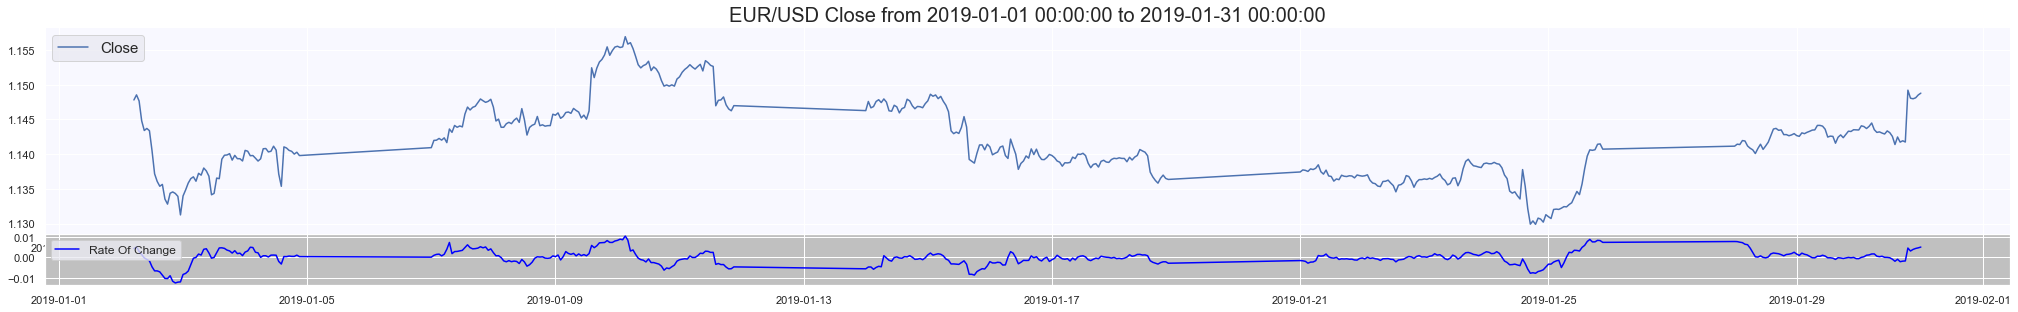

CPU times: user 1.85 s, sys: 416 ms, total: 2.26 s
Wall time: 2.25 s


In [11]:
%%time
##### Par défaut, _fast=5,_slow=15,_plot=0 et les **args suivants sont à None. macd(df_all) suffit
df_all = rc(df_all,_slow=15,_plot=1,_ticker='EUR/USD',start=_start,end=_end)

In [12]:
############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [13]:
%%time
df_all.to_csv('DF_ALL.csv')

CPU times: user 1min 49s, sys: 1.9 s, total: 1min 50s
Wall time: 1min 51s


In [14]:
############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [60]:
import time
import sys
sys.path.append('../')
from  librairies.dagfeaturingfx import *
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
import joblib
from joblib import Parallel,delayed
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier

df_all = pd.read_csv('DF_ALL.csv')
df_all.set_index(pd.to_datetime(df_all.DATE,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)

###### On drop les colonnes inutiles
df_all = df_all.drop(['DATE'],axis=1)

In [16]:
############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [17]:
%%time
df_all['Close_Shifted'] = df_all.groupby('Symbol')['Close'].transform(lambda x: x.shift(-6))
df_all['Target'] = ((df_all['Close_Shifted'] - df_all['Open'])/(df_all['Open']) * 100).shift(-1)
df_all['Target_Direction'] = np.where(df_all['Target']>0,1,0)
df_all = df_all.drop(['Close_Shifted'],axis=1)
df_all = df_all.dropna().copy()

CPU times: user 2.11 s, sys: 1.17 s, total: 3.28 s
Wall time: 3.22 s


https://en.wikipedia.org/wiki/Winsorizing

Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. It is named after the engineer-turned-biostatistician Charles P. Winsor (1895–1951). The effect is the same as clipping in signal processing.

from scipy.stats.mstats import winsorize
winsorize([92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41], limits=[0.05, 0.05])


In [18]:
%%time
'''Before we begin to develop our prediction model, it is important to deal with the outliers that exist in our explanatory variables, i.e. our Technical Indicators. There are multiple ways in which outliers can be treated, one of which is winsorizing the data. The idea of winsorizing is to bring extreme outliers to the closest value that is not considered an outlier. For example, here we winsorize 10% lowest and 10% highest values, thus the extreme values will now change to the 10th percentile and the 90th percentile values respectively. One of the key advantages of winsorizing is that the information contained in the extreme outliers is not lost; only the absolute values of those are sensitized.'''
_fast = 5
_slow = 15
Target_variables = ['SMA_ratio','ATR_'+str(_fast),'ATR_'+str(_slow),'ATR_Ratio',
                       'ADX_'+str(_fast),'ADX_'+str(_slow),'Stochastic_'+str(_fast),'Stochastic_'+str(_slow),'Stochastic_Ratio',
                      'RSI_'+str(_fast),'RSI_'+str(_slow),'RSI_ratio','MACD']
for variable in tqdm(Target_variables):
    df_all.loc[:,variable] = mstats.winsorize(df_all.loc[:,variable], limits = [0.1,0.1])

100%|██████████| 13/13 [00:04<00:00,  2.75it/s]CPU times: user 4.67 s, sys: 68.8 ms, total: 4.74 s
Wall time: 4.73 s



In [19]:
%time
##### On mets les returns dans un dataframe a part
returns = df_all[['Symbol','Target_Direction']].copy()


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [20]:
%%time
##### On créé une colonne 'Date' à partir de l'index
returns['Date'] = returns.index.copy()


CPU times: user 4.65 ms, sys: 718 µs, total: 5.37 ms
Wall time: 4.32 ms


In [21]:
returns

,Symbol,Target_Direction,Date
DATE,,,
2010-01-05 05:00:00,USDHKD,0,2010-01-05 05:00:00
2010-01-05 06:00:00,USDHKD,1,2010-01-05 06:00:00
2010-01-05 07:00:00,USDHKD,1,2010-01-05 07:00:00
2010-01-05 08:00:00,USDHKD,1,2010-01-05 08:00:00
2010-01-05 09:00:00,USDHKD,1,2010-01-05 09:00:00
...,...,...,...
2020-12-24 07:00:00,XAGUSD,1,2020-12-24 07:00:00
2020-12-24 08:00:00,XAGUSD,0,2020-12-24 08:00:00
2020-12-24 09:00:00,XAGUSD,0,2020-12-24 09:00:00


In [22]:
%%time
##### On fait un pivot table autour du return pour avoir une série de return pour chaque ticker
transposed = returns.pivot(index = 'Date', columns = 'Symbol', values = 'Target_Direction')


CPU times: user 844 ms, sys: 133 ms, total: 976 ms
Wall time: 976 ms


In [23]:
transposed

Symbol,AUDCAD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,CADCHF,CADJPY,CHFJPY,EURAUD,EURCAD,...,USDHKD,USDJPY,USDMXN,USDNOK,USDSEK,USDTRY,USDZAR,XAGUSD,XAUUSD,ZARJPY
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05 05:00:00,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0
2010-01-05 06:00:00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,0.0,0.0
2010-01-05 07:00:00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2010-01-05 08:00:00,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2010-01-05 09:00:00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 10:00:00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2020-12-24 11:00:00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2020-12-24 12:00:00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,1.0


In [28]:
%%time
##### On transpose alors la df pour avoir les tickers au niveau des index et les dates en colonne, car les clusters se feront au niveau de l'index
X = transposed.dropna().transpose()


CPU times: user 12.2 ms, sys: 1.8 ms, total: 14 ms
Wall time: 12.3 ms


CPU times: user 1min 20s, sys: 15.2 s, total: 1min 35s
Wall time: 14.3 s


,Difference in SS
1,NaN
2,-77627.508537
3,-33301.974837
4,-28326.779204
5,-20318.121934
6,-17885.396248
7,-19059.822222
8,-10935.355556
9,-19071.130952
10,-10300.247619


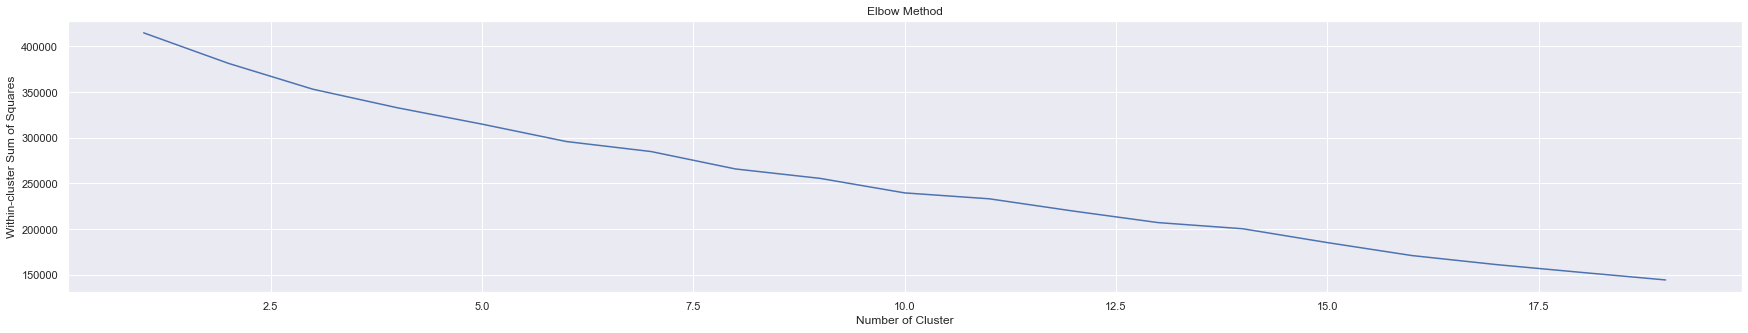

In [60]:
%%time
#Extract sum of squares for K-means clusters from 1 to 50 clusters
sum_of_sq = np.zeros([20, 1])
for k in range(1, 21):
    sum_of_sq[k-1] = KMeans(n_clusters=k).fit(X).inertia_
plt.figure(figsize=(30,5))
plt.plot(range(1, 20), sum_of_sq[1:20])
plt.title("Elbow Method") 
plt.xlabel("Number of Cluster") 
plt.ylabel("Within-cluster Sum of Squares")

pd.DataFrame(sum_of_sq, columns = ['Difference in SS'], index = range(1,21)).diff()

In [89]:
%%time
#Cluster K-means
model=KMeans(n_clusters=10)
#adapter le modèle de données
model.fit(X)

CPU times: user 3.39 s, sys: 1.17 s, total: 4.56 s
Wall time: 807 ms


KMeans(n_clusters=10)

In [90]:
print(model.labels_)

[7 3 3 3 7 3 2 2 0 6 6 2 5 6 5 9 6 0 0 8 2 0 8 7 3 2 7 2 4 5 5 4 2 4 5 5 9
 4 1 1 2]


In [91]:
clusters_df = pd.DataFrame({'Cluster':model.labels_,
                           'Companies':transposed.columns})

#Sort by Clusters
clusters_df = clusters_df.sort_values(['Cluster']).reset_index(drop = True)

In [92]:
clusters_df[clusters_df.Cluster==0]

,Cluster,Companies
0,0,GBPNZD
1,0,GBPCAD
2,0,EURAUD
3,0,GBPAUD


In [93]:
clusters_df[clusters_df.Cluster==1]

,Cluster,Companies
4,1,XAGUSD
5,1,XAUUSD


In [94]:
clusters_df[clusters_df.Cluster==2]

,Cluster,Companies
6,2,GBPJPY
7,2,USDJPY
8,2,TRYJPY
9,2,NZDJPY
10,2,EURJPY
11,2,ZARJPY
12,2,CHFJPY
13,2,CADJPY


In [95]:
clusters_df[clusters_df.Cluster==3]

,Cluster,Companies
14,3,AUDJPY
15,3,AUDCHF
16,3,AUDNZD
17,3,CADCHF
18,3,NZDCHF


In [96]:
clusters_df[clusters_df.Cluster==4]

,Cluster,Companies
19,4,USDCAD
20,4,USDZAR
21,4,USDHKD
22,4,USDMXN


In [97]:
clusters_df[clusters_df.Cluster==5]

,Cluster,Companies
23,5,USDCNH
24,5,USDCHF
25,5,EURNOK
26,5,EURSEK
27,5,USDNOK
28,5,USDSEK


In [98]:
clusters_df[clusters_df.Cluster==6]

,Cluster,Companies
29,6,EURGBP
30,6,EURCAD
31,6,EURUSD
32,6,EURNZD


In [99]:
clusters_df[clusters_df.Cluster==7]

,Cluster,Companies
33,7,NZDUSD
34,7,NZDCAD
35,7,AUDUSD
36,7,AUDCAD


In [100]:
clusters_df[clusters_df.Cluster==8]

,Cluster,Companies
37,8,GBPUSD
38,8,GBPCHF


In [101]:
clusters_df[clusters_df.Cluster==9]

,Cluster,Companies
39,9,USDTRY
40,9,EURTRY


In [103]:
df_all.index = pd.to_datetime(df_all.index)

train_data = df_all.loc[:'2018-12-31',]
test_data = df_all.loc['2019-01-01':] 

CPU times: user 40min 12s, sys: 16.2 s, total: 40min 28s
Wall time: 40min 31s


Text(0.5, 1.0, 'Validation Curve Score for n_estimators')

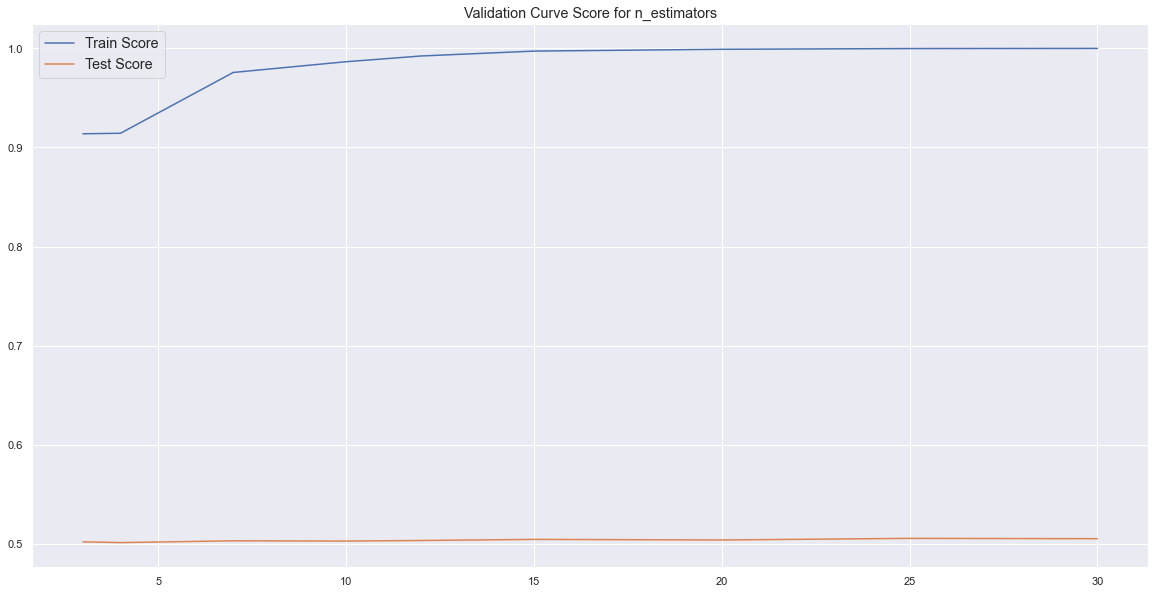

In [105]:
%%time
#Separate between X and Y
X_train = train_data.loc[:,Target_variables]

Y_train = train_data.loc[:,['Target_Direction']]

#Create validation curve for the Random Forest Classifier
rf = RandomForestClassifier()
train_scoreNum, test_scoreNum = validation_curve(rf,
                                X = X_train['2010-01-01':], y = Y_train.loc['2010-01-01':,'Target_Direction'], 
                                param_name = 'n_estimators', 
                                param_range = [3,4,7,10,12,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)


Text(0.5, 1.0, 'Validation Curve Score for n_estimators')

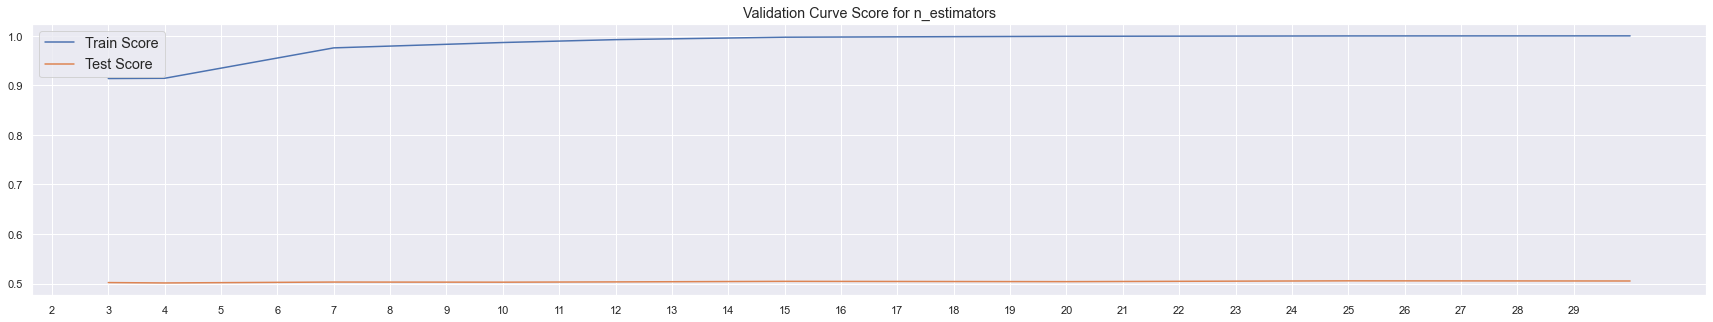

In [109]:
plt.figure(figsize = (30,5))
axes = pyplot.gca()
axes.xaxis.set_ticks(range(30))
plt.plot([3,4,7,10,12,15,20,25,30],train_scores_mean)
plt.plot([3,4,7,10,12,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for n_estimators', fontsize = 'large')

In [121]:
%%time
import pickle
from sklearn.model_selection import GridSearchCV
for cluster_selected in tqdm(clusters_df.Cluster.unique()):
    
    print(f'The current cluster running is : {cluster_selected}')
    
    #Get data for that cluster
    co_data = df_all[df_all.Symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    co_train = co_data[co_data.index<='2018-12-31']
    co_train = co_train.dropna().copy()
    
    X_train = co_train.loc[:,Target_variables]

    Y_train = co_train.loc[:,['Target_Direction']]

    #Define paramters from Validation Curve
    params = {'max_depth': [5, 7],
          'max_features': ['sqrt'],
          'min_samples_leaf': [10, 15, 20],
          'n_estimators': [5, 7, 9],
         'min_samples_split':[20, 25, 30]} #Using Validation Curves

    rf = RandomForestClassifier()

    #Perform a TimeSeriesSplit on the dataset
    time_series_split = TimeSeriesSplit(n_splits = 3)

    
    rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = -1, verbose = 20)

    #Fit the random forest with our X_train and Y_train
    rf_cv.fit(X_train, Y_train)
          
    #Save the fited variable into a Pickle file
    pickle.dump(rf_cv, open('Pickle/Clusters/Cluster'+str(cluster_selected),'wb'))

  0%|          | 0/10 [00:00<?, ?it/s]The current cluster running is : 0
Fitting 3 folds for each of 54 candidates, totalling 162 fits
 10%|█         | 1/10 [00:20<03:08, 20.90s/it]The current cluster running is : 1
Fitting 3 folds for each of 54 candidates, totalling 162 fits
 20%|██        | 2/10 [00:28<02:15, 16.98s/it]The current cluster running is : 2
Fitting 3 folds for each of 54 candidates, totalling 162 fits
 30%|███       | 3/10 [01:16<03:03, 26.16s/it]The current cluster running is : 3
Fitting 3 folds for each of 54 candidates, totalling 162 fits
 40%|████      | 4/10 [01:43<02:38, 26.48s/it]The current cluster running is : 4
Fitting 3 folds for each of 54 candidates, totalling 162 fits
 50%|█████     | 5/10 [02:03<02:02, 24.55s/it]The current cluster running is : 5
Fitting 3 folds for each of 54 candidates, totalling 162 fits
 60%|██████    | 6/10 [02:37<01:49, 27.32s/it]The current cluster running is : 6
Fitting 3 folds for each of 54 candidates, totalling 162 fits
 70%|██

In [134]:
%%time
#Use 2nd January Data
day_data = test_data.loc['2019-01-02 09:00:00']

pred_for_tomorrow = pd.DataFrame({'Date':[],
                                  'company':[],
                                  'prediction':[]})

#Predict each stock using the 2nd January Data
for cluster_selected in clusters_df.Cluster.unique():
    rf_cv =  pickle.load(open('Pickle/Clusters/Cluster'+str(cluster_selected), 'rb'))
    best_rf = rf_cv.best_estimator_
    cluster_data = day_data.loc[day_data.Symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,Target_variables]

        pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
                                                                   'company':cluster_data['Symbol'],
                                                                   'prediction':best_rf.predict_proba(X_test)[:,1]}), ignore_index = True)

CPU times: user 67.2 ms, sys: 3.46 ms, total: 70.7 ms
Wall time: 69.1 ms


In [136]:
%%time
top_10_pred = pred_for_tomorrow.sort_values(by = ['prediction'], ascending = False).head(10)

for selected_company in top_10_pred['company']:
    actual = df_all[df_all.Symbol == selected_company].loc['2019-01-02 09:00:00','Target_Direction']
    pct_change = df_all[df_all.Symbol == selected_company].loc['2019-01-02 09:00:00','Target']
    top_10_pred.loc[top_10_pred.company == selected_company,'actual'] = actual
    top_10_pred.loc[top_10_pred.company == selected_company,'pct_change'] = pct_change

CPU times: user 2.42 s, sys: 19.1 ms, total: 2.44 s
Wall time: 2.45 s


In [137]:
top_10_pred

,Date,company,prediction,actual,pct_change
12,2019-01-02 09:00:00,TRYJPY,0.611792,0.0,-0.765652
10,2019-01-02 09:00:00,CHFJPY,0.586082,0.0,-0.220723
6,2019-01-02 09:00:00,EURJPY,0.583402,0.0,-0.422962
7,2019-01-02 09:00:00,USDJPY,0.570286,1.0,0.253802
9,2019-01-02 09:00:00,CADJPY,0.563545,1.0,0.514046
37,2019-01-02 09:00:00,GBPCHF,0.543446,0.0,-0.245136
13,2019-01-02 09:00:00,GBPJPY,0.532363,0.0,-0.463633
11,2019-01-02 09:00:00,NZDJPY,0.526801,0.0,-0.378930
15,2019-01-02 09:00:00,AUDJPY,0.519579,1.0,0.016354
33,2019-01-02 09:00:00,NZDCAD,0.518789,0.0,-0.887013


In [7]:
df_all.groupby('Symbol')['High'].rolling(10).max()

Symbol  DATE               
AUDCAD  2010-01-04 00:00:00       NaN
        2010-01-04 01:00:00       NaN
        2010-01-04 02:00:00       NaN
        2010-01-04 03:00:00       NaN
        2010-01-04 04:00:00       NaN
                                ...  
ZARJPY  2020-12-24 15:00:00    7.1080
        2020-12-24 16:00:00    7.1080
        2020-12-24 17:00:00    7.1080
        2020-12-24 18:00:00    7.1045
        2020-12-24 19:00:00    7.1035
Name: High, Length: 2712022, dtype: float64

In [78]:
%%time

def jyss_osc(_ticker,df_all):
    df = pd.DataFrame()
    df['HiWin'] = df_all[df_all.Symbol==_ticker].High.rolling(10).max()
    df['LoWin'] = df_all[df_all.Symbol==_ticker].Low.rolling(10).min()
    df['JyssOscBear'] = ((df.HiWin-df.HiWin.shift(2))/df.HiWin.shift(2))*1000
    df['JyssOscBearSD'] = df.JyssOscBear.rolling(20).std()
    df['JyssOscBull'] = ((df.LoWin-df.LoWin.shift(2))/df.LoWin.shift(2))*1000
    df['JyssOscBullSD'] = df.JyssOscBull.rolling(20).std()
    df['TriggerBear'] = (df.HiWin - df.HiWin.shift(2)) * 1000
    df['TriggerBull'] = (df.LoWin - df.LoWin.shift(2)) * 1000
    df['Trigger'] = np.where((df.LoWin - df.LoWin.shift(9) == 0),1,np.where((df.HiWin - df.HiWin.shift(9) == 0 ),1,0))
    return(df)

df_temp = pd.DataFrame()
number_of_cpu = joblib.cpu_count()
delayed_funcs = [delayed(jyss_osc)(_ticker=_ticker,df_all=df_all) for _ticker in tqdm(df_all.Symbol.unique())]
parallel_pool = Parallel(n_jobs=number_of_cpu,prefer="processes")
df_temp = df_temp.append(parallel_pool(delayed_funcs))
df_all = pd.concat((df_all,df_temp),axis=1)


100%|██████████| 41/41 [00:00<00:00, 229288.62it/s]
CPU times: user 3.58 s, sys: 2.26 s, total: 5.83 s
Wall time: 6.15 s


In [79]:
df_temp

,HiWin,LoWin,JyssOscBear,JyssOscBearSD,JyssOscBull,JyssOscBullSD,TriggerBear,TriggerBull,Trigger
DATE,,,,,,,,,
2010-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2020-12-24 14:00:00,25.9105,25.418,0.000000,1.341386,-6.934813,3.772086,0.0,-177.5,0
2020-12-24 15:00:00,25.9105,25.418,0.000000,1.318387,-6.934813,4.188806,0.0,-177.5,0
2020-12-24 16:00:00,25.9105,25.418,0.000000,1.288336,0.000000,4.188806,0.0,0.0,0


In [81]:
df_all

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Symbol,Open,...,Trigger,HiWin,LoWin,JyssOscBear,JyssOscBearSD,JyssOscBull,JyssOscBullSD,TriggerBear,TriggerBull,Trigger
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00,7.75372,7.75562,7.75372,7.75562,7.75558,7.75758,7.75517,7.75708,USDHKD,7.75465,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 01:00:00,7.75562,7.75623,7.75547,7.75617,7.75708,7.75747,7.75683,7.75743,USDHKD,7.75635,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 02:00:00,7.75617,7.75647,7.75597,7.75647,7.75743,7.75773,7.75727,7.75773,USDHKD,7.75680,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 03:00:00,7.75647,7.75737,7.75647,7.75717,7.75773,7.75888,7.75773,7.75843,USDHKD,7.75710,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-04 04:00:00,7.75717,7.75717,7.75703,7.75713,7.75843,7.75843,7.75827,7.75837,USDHKD,7.75780,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 14:00:00,25.65700,25.77800,25.39200,25.75900,25.70500,25.82600,25.44400,25.80900,XAGUSD,25.68100,...,0,25.9105,25.418,0.000000,1.341386,-6.934813,3.772086,0.0,-177.5,0
2020-12-24 15:00:00,25.75900,25.82400,25.71200,25.73900,25.80900,25.87200,25.76200,25.78700,XAGUSD,25.78400,...,0,25.9105,25.418,0.000000,1.318387,-6.934813,4.188806,0.0,-177.5,0
2020-12-24 16:00:00,25.73900,25.79000,25.73000,25.74900,25.78700,25.83800,25.77900,25.79900,XAGUSD,25.76300,...,0,25.9105,25.418,0.000000,1.288336,0.000000,4.188806,0.0,0.0,0
